# State Transition - only states

In [1]:
import numpy as np
import os
from libraries.utils import *
from libraries.state_transition import StateTransition as st
import pandas as pd
from collections import defaultdict


## Load Data

In [2]:
############ configuration ################
############################################

CODE = 'mamba2'       ### application (code) theft_protection, mamba2
BEHAVIOUR_FAULTY = 'faulty_data'            ### normal, faulty_data
BEHAVIOUR_NORMAL = 'normal'            ### normal, faulty_data
THREAD = 'single'           ### single, multi
VER = 3                     ### format of data collection

base_dir = '../trace_data' ### can be replaced with 'csv', 'exe_plot', 'histogram'
normalbase_path = base_dir+f'/{CODE}/{THREAD}_thread/version_{VER}/{BEHAVIOUR_NORMAL}'
faultybase_path = base_dir+f'/{CODE}/{THREAD}_thread/version_{VER}/{BEHAVIOUR_FAULTY}'

print(normalbase_path)
print(faultybase_path)


../trace_data/mamba2/single_thread/version_3/normal
../trace_data/mamba2/single_thread/version_3/faulty_data


In [3]:

train_base_path = os.path.join(normalbase_path, 'train_data')
train_data_path = [os.path.join(train_base_path, x) for x in os.listdir(train_base_path)]
train_varlist_path = os.listdir(normalbase_path)
train_varlist_path = [os.path.join(normalbase_path, x) for x in train_varlist_path if 'varlist' in x]

######### get paths #######################
paths_log, paths_traces, varlist_path, paths_label = get_paths(faultybase_path)

### remove.Ds_store from all lists
train_data_path = [x for x in train_data_path if '.DS_Store' not in x]
train_varlist_path = [x for x in train_varlist_path if '.DS_Store' not in x]

paths_log = [x for x in paths_log if '.DS_Store' not in x]
paths_traces = [x for x in paths_traces if '.DS_Store' not in x]
varlist_path = [x for x in varlist_path if '.DS_Store' not in x]
paths_label = [x for x in paths_label if '.DS_Store' not in x]

paths_log.sort()
paths_traces.sort()
varlist_path.sort()
paths_label.sort()

print(train_data_path)
print(paths_log)
print(paths_traces)
print(varlist_path)
print(paths_label)

test_data_path = paths_traces
test_label_path = paths_label


['../trace_data/mamba2/single_thread/version_3/normal/train_data/interval_8260_11000.json', '../trace_data/mamba2/single_thread/version_3/normal/train_data/interval_0_6200.json', '../trace_data/mamba2/single_thread/version_3/normal/train_data/interval_6500_9910.json', '../trace_data/mamba2/single_thread/version_3/normal/train_data/interval_0_8260.json', '../trace_data/mamba2/single_thread/version_3/normal/train_data/trace_trial3']
[]
['../trace_data/mamba2/single_thread/version_3/faulty_data/trace_trial2', '../trace_data/mamba2/single_thread/version_3/faulty_data/trace_trial3', '../trace_data/mamba2/single_thread/version_3/faulty_data/trace_trial4']
['../trace_data/mamba2/single_thread/version_3/faulty_data/varlist_trial2.json', '../trace_data/mamba2/single_thread/version_3/faulty_data/varlist_trial3.json', '../trace_data/mamba2/single_thread/version_3/faulty_data/varlist_trial4.json']
['../trace_data/mamba2/single_thread/version_3/faulty_data/labels/trace_trial2_labels.json', '../trac

In [4]:
############# check varlist is consistent ############
############# only for version 3 ######################

if VER == 3:
    check_con, _ = is_consistent([train_varlist_path[0]]+ varlist_path) ### compare with train varlist

    if check_con != False:
        to_number = read_json(varlist_path[0])
        from_number = mapint2var(to_number)
    else:
        ### load normal varlist
        print('loading normal varlist')
        to_number = read_json(train_varlist_path[0])
        from_number = mapint2var(to_number)



varlist 1 is consistent with varlist 0
varlist 2 is consistent with varlist 0
varlist 3 is consistent with varlist 0


In [5]:
############ Get variable list ######################
sorted_keys = list(from_number.keys())
sorted_keys.sort()
var_list = [from_number[key] for key in sorted_keys]   ### get the variable list
# print(var_list)

In [6]:
print(train_data_path[0])
print(train_data_path[0].find('.npy'))
print(train_data_path[0].find('.json') )

if train_data_path[0].find('.npy') != -1:
    sample_data = load_sample(train_data_path[0])
    print('.npy')
elif train_data_path[0].find('.json') != -1:
    sample_data = read_traces(train_data_path[0])
    print('.json')
else:
    sample_data = read_traces(train_data_path[0])
    print('no extension')

../trace_data/mamba2/single_thread/version_3/normal/train_data/interval_8260_11000.json
-1
82
.json


## Training

In [7]:
### initialize
model = st()
model.train(train_data_path)

../trace_data/mamba2/single_thread/version_3/normal/train_data/interval_8260_11000.json
../trace_data/mamba2/single_thread/version_3/normal/train_data/interval_0_6200.json
../trace_data/mamba2/single_thread/version_3/normal/train_data/interval_6500_9910.json
../trace_data/mamba2/single_thread/version_3/normal/train_data/interval_0_8260.json
../trace_data/mamba2/single_thread/version_3/normal/train_data/trace_trial3


In [8]:
transitions = model.transitions
transitions

defaultdict(list,
            {56: [57, 50, 73],
             57: [67, 58, 60, 62, 63, 64, 65, 66, 68],
             67: [23, 68, 70, 73],
             23: [24, 70],
             24: [49, 25, 73],
             49: [49, 56, 57, 50, 68, 70, 73],
             50: [50, 31, 53, 69, 27, 51],
             31: [50, 30, 68],
             53: [54, 73],
             54: [55],
             55: [56],
             58: [59],
             59: [20, 49],
             20: [21, 73],
             21: [22],
             22: [49, 23],
             60: [61],
             61: [49, 70],
             62: [61, 73],
             63: [61],
             64: [23, 70, 73, 68],
             65: [23, 68, 70, 73],
             66: [23, 73, 70, 68, 74],
             70: [23, 71, 70, 49, 24, 57, 73, 68],
             68: [23, 64, 70, 50, 49],
             69: [51, 53],
             51: [26, 28, 52],
             26: [53, 27],
             71: [72],
             72: [23, 70],
             73: [70, 23, 49, 21, 57, 54, 61, 56

In [9]:
### viz transitions

for key in transitions.keys():
    print(from_number[key], ':', end=' ')
    for val in transitions[key]:
        print(from_number[val], end=', ')
    print('\n')

0-0-0-j : 0-0-0-func_call, 0-0-0-msg, 0-0-cb_retrans-cb_retrans_done, 

0-0-0-func_call : 0-0-measure_am4-0, 0-0-measure_scd30-0, 0-0-measure_co-0, 0-0-measure_o2-0, 0-0-measure_bmp-0, 0-0-measure_am1-0, 0-0-measure_am2-0, 0-0-measure_am3-0, 0-0-cb_30-cb_30_done, 

0-0-measure_am4-0 : 0-0-0-am_temp, 0-0-cb_30-cb_30_done, 0-0-cb_lora-rcv_msg, 0-0-cb_retrans-cb_retrans_done, 

0-0-0-am_temp : 0-0-0-am_hum, 0-0-cb_lora-rcv_msg, 

0-0-0-am_hum : 0-0-0-SENSOR_DATA, 0-0-0-que, 0-0-cb_retrans-cb_retrans_done, 

0-0-0-SENSOR_DATA : 0-0-0-SENSOR_DATA, 0-0-0-j, 0-0-0-func_call, 0-0-0-msg, 0-0-cb_30-cb_30_done, 0-0-cb_lora-rcv_msg, 0-0-cb_retrans-cb_retrans_done, 

0-0-0-msg : 0-0-0-msg, 0-0-crc32-crc, 0-0-0-current_time, 0-0-add_to_que-que, 0-0-0-cb_retrans_done, 0-0-0-start_time, 

0-0-crc32-crc : 0-0-0-msg, 0-0-0-hb_msg, 0-0-cb_30-cb_30_done, 

0-0-0-current_time : 0-0-0-SENSOR_STATUS, 0-0-cb_retrans-cb_retrans_done, 

0-0-0-SENSOR_STATUS : 0-0-0-LIMITS_BROKEN, 

0-0-0-LIMITS_BROKEN : 0-0-0-j,

## Validation

In [10]:
DIFF_VAL = 5
#### Validate model
all_detections = []  ### format [file1_detection, file2_detection] -> file1_detection: [(state1, state2), (ts1, ts2), filename]
y_pred_all = []
y_true_all = []
all_tp = []
all_fp = []
for test_data, test_label in zip(test_data_path, test_label_path):
    detection = model.test_single(test_data)
    all_detections += [(test_data, detection, test_label)]  ### used to plot detections
    print('Detections:', detection)
    print('len of detections:', len(detection))

    merged_detection, grouped_det = st.merge_detections(detection, DIFF_VAL)  ### merge detections for multiple variables
    detection = merged_detection


    ground_truth_raw = read_traces(test_label)
    ground_truth = ground_truth_raw['labels']
    label_trace_name = list(ground_truth.keys())[0]
    ground_truth = ground_truth[label_trace_name]
    print('ground truths:', ground_truth)
    print(len(ground_truth))

    correct_pred, rest_pred, y_pred, y_true, false_neg = model.get_correct_detections(detection, ground_truth)

    y_pred_all.extend(y_pred)
    y_true_all.extend(y_true)
    all_tp += [(test_data, correct_pred, test_label)]
    all_fp += [(test_data, rest_pred, test_label)]
    


# result = model.test(test_data_path)

{56: [57, 50, 73], 57: [67, 58, 60, 62, 63, 64, 65, 66, 68], 67: [23, 68, 70, 73], 23: [24, 70], 24: [49, 25, 73], 49: [49, 56, 57, 50, 68, 70, 73], 50: [50, 31, 53, 69, 27, 51], 31: [50, 30, 68], 53: [54, 73], 54: [55], 55: [56], 58: [59], 59: [20, 49], 20: [21, 73], 21: [22], 22: [49, 23], 60: [61], 61: [49, 70], 62: [61, 73], 63: [61], 64: [23, 70, 73, 68], 65: [23, 68, 70, 73], 66: [23, 73, 70, 68, 74], 70: [23, 71, 70, 49, 24, 57, 73, 68], 68: [23, 64, 70, 50, 49], 69: [51, 53], 51: [26, 28, 52], 26: [53, 27], 71: [72], 72: [23, 70], 73: [70, 23, 49, 21, 57, 54, 61, 56], 27: [52, 28], 52: [53, 52], 28: [29], 29: [26, 30], 0: [1], 1: [2], 2: [3], 3: [4], 4: [5], 5: [6], 6: [7], 7: [8], 8: [9], 9: [10], 10: [11], 11: [12], 12: [13], 13: [14], 14: [15], 15: [16], 16: [17], 17: [18], 18: [19], 19: [20], 25: [26], 30: [31, 32], 32: [33], 33: [34], 34: [35], 35: [36], 36: [37], 37: [38], 38: [39], 39: [40], 40: [41], 41: [42], 42: [43], 43: [44], 44: [45], 45: [46], 46: [47], 47: [48], 

TypeError: 'int' object is not iterable

In [12]:
print('y_pred', y_pred_all)
print('y_true', y_true_all)
print(len(y_true_all))

y_pred [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_true [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
152


Precision: 0.2881
Recall: 0.5000
F1 Score: 0.3656
Confusion Matrix:
[[ 0 84]
 [34 34]]


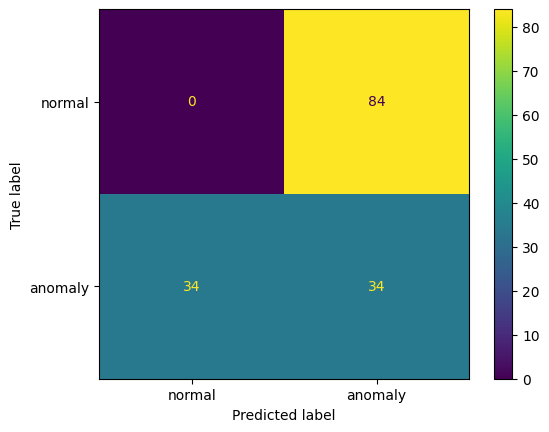

In [13]:
### Evaluation metrics

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, average_precision_score, ConfusionMatrixDisplay


# Calculate precision
precision = precision_score(y_true_all, y_pred_all)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_true_all, y_pred_all)
print(f'Recall: {recall:.4f}')

# # Calculate average precision
# average_precision = average_precision_score(y_true_all, y_pred_all)
# print(f'Average Precision: {average_precision:.4f}')

# Calculate F1 score
f1 = f1_score(y_true_all, y_pred_all)
print(f"F1 Score: {f1:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
print("Confusion Matrix:")
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['normal', 'anomaly'])
disp.plot()

## Save Detections

In [ ]:
######## save detections for the dashboard to plot #############
import traceback

DIFF_VAL = 0

for test_data, detections, test_label in all_detections:
    # print(test_data, test_label)
    # print(test_label.replace('labels', 'detections'))
    detection_path = test_label.replace('labels', f'st_detections')
    detection_path = detection_path.replace('st_detections.json', f'st_detections_{DIFF_VAL}.json')
    # tp_detection_path = detection_path.replace('ei_detections.json', f'tp_ei_detections_{DIFF_VAL}.json')
    # fp_detection_path = detection_path.replace('ei_detections.json', f'fp_ei_detections_{DIFF_VAL}.json')
    # print(detections)

    detection_dir = os.path.dirname(detection_path)
    # print(detection_dir)
    if not os.path.exists(detection_dir):
        os.makedirs(detection_dir)
        print(f'Created Directory: {detection_dir}')

    try:
        with open(detection_path, 'w') as f:
            json.dump(detections, f)
            print(f'Saved detections in {detection_path}')

            
    except Exception as e:
        traceback.print_exception(e)
        print('Error in saving detections')
        continue

for test_data, detections, test_label in all_tp:
    # print(test_data, test_label)
    # print(test_label.replace('labels', 'detections'))
    detection_path = test_label.replace('labels', 'st_detections')
    tp_detection_path = detection_path.replace('st_detections.json', f'tp_st_detections_{DIFF_VAL}.json')
    # fp_detection_path = detection_path.replace('ei_detections.json', 'fp_ei_detections.json')
    # print(detections)

    detection_dir = os.path.dirname(detection_path)
    # print(detection_dir)
    if not os.path.exists(detection_dir):
        os.makedirs(detection_dir)
        print(f'Created Directory: {detection_dir}')

    try:

        with open(tp_detection_path, 'w') as f:
            json.dump(detections, f)
            print(f'Saved detections in {tp_detection_path}')
            
    except Exception as e:
        traceback.print_exception(e)
        print('Error in saving detections')
        continue

for test_data, detections, test_label in all_fp:
    # print(test_data, test_label)
    # print(test_label.replace('labels', 'detections'))
    detection_path = test_label.replace('labels', 'st_detections')
    # tp_detection_path = detection_path.replace('ei_detections.json', 'tp_ei_detections.json')
    fp_detection_path = detection_path.replace('st_detections.json', f'fp_st_detections_{DIFF_VAL}.json')
    # print(detections)

    detection_dir = os.path.dirname(detection_path)
    # print(detection_dir)
    if not os.path.exists(detection_dir):
        os.makedirs(detection_dir)
        print(f'Created Directory: {detection_dir}')

    try:

        with open(fp_detection_path, 'w') as f:
            json.dump(detections, f)
            print(f'Saved detections in {fp_detection_path}')
            
    except Exception as e:
        traceback.print_exception(e)
        print('Error in saving detections')
        continue

## Plot Detections

In [14]:
# ### plot gt and detections
# for test_data, detections, test_label_path in all_detections:
# # for test_data, detections, test_label_path in all_tp:
#     print('test_data:', test_data)
#     print('detections:', detections)

#     ### prepare trace to plot
#     col_data = preprocess_traces([test_data])
#     all_df = get_dataframe(col_data) 
#     # print(all_df[0])

#     ### prepare detections to plot
#     timestamps = col_data[0][1]
#     print('timestamps:', timestamps)
#     plot_val = []
#     plot_x_ticks = []
#     plot_class = []
#     for det in detections:
#         print(det)
#         det_ts1, det_ts2 = det[1]
#         print(det_ts1, det_ts2)

#         det_ind1_pre = [ abs(t-det_ts1) for t in timestamps]
#         det_ind1 = det_ind1_pre.index(min(det_ind1_pre))

#         det_ind2_pre = [ abs(t-det_ts2) for t in timestamps]
#         det_ind2 = det_ind2_pre.index(min(det_ind2_pre))
#         # print(det_ind1, det_ind2)
#         # print(timestamps[det_ind1], timestamps[det_ind2])

#         plot_val += [(det_ind1, det_ind2)]
#         plot_x_ticks += [(timestamps[det_ind1], timestamps[det_ind2])]
#         plot_class += [0]

#     plot_detections = [plot_val, plot_x_ticks, plot_class]

#     ### get ground truths
#     gt_plot = prepare_gt(test_label_path)

#     ### plot
#     for df in all_df:
#         # print(df.columns)
#         plot_fig = plot_single_trace(df, 
#                           var_list, 
#                           with_time=False, 
#                           is_xticks=True, 
#                           detections=plot_detections, 
#                           dt_classlist=['detection'],
#                           ground_truths=gt_plot,
#                           gt_classlist=['gt_communication', 'gt_sensor', 'gt_bitflip'],
#                           )
#         plot_fig.show()

#     # break

### generate transition table

In [15]:
# import pandas as pd
# from pptx import Presentation
# from pptx.util import Inches
# from pptx.util import Pt
# from pptx.util import Inches
# from pptx.dml.color import RGBColor

# # Create a DataFrame from the dictionary
# df = pd.DataFrame(list(transitions.items()), columns=['Key', 'Values'])

# # Combine values for each key into a single cell
# df_combined = df.groupby('Key')['Values'].agg(lambda x: ', '.join(map(str, x))).reset_index()

# # Create a PowerPoint presentation
# presentation = Presentation()

# # Add a slide to the presentation
# slide_layout = presentation.slide_layouts[5]  # Using a blank slide layout
# slide = presentation.slides.add_slide(slide_layout)

# # Define the position and size of the table
# left = Inches(1)
# top = Inches(1)
# width = Inches(6)
# height = Inches(4)

# # Add a table shape to the slide
# table = slide.shapes.add_table(rows=df_combined.shape[0] + 1, cols=df_combined.shape[1], left=left, top=top, width=width, height=height).table

# # Add column names to the first row
# for col, col_name in enumerate(df_combined.columns):
#     cell = table.cell(0, col)
#     cell.text = col_name
#     cell.text_frame.text = col_name
#     cell.text_frame.paragraphs[0].font.size = Pt(10)
#     cell.text_frame.paragraphs[0].font.bold = True
#     cell.fill.solid()
#     cell.fill.fore_color.rgb = RGBColor(240, 240, 240)  # Light gray background color

# # Add data to the table
# for row in range(df_combined.shape[0]):
#     for col in range(df_combined.shape[1]):
#         cell = table.cell(row + 1, col)
#         cell.text = str(df_combined.iloc[row, col])
#         cell.text_frame.text = str(df_combined.iloc[row, col])
#         cell.text_frame.paragraphs[0].font.size = Pt(10)

# # Save the PowerPoint presentation
# presentation.save('table_presentation.pptx')

